# Description
## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary

`CustomerId`: Unique ID which is assigned to each customer

`Surname`: Last name of the customer 

`CreditScore`: It defines the credit history of the customer. 

`Geography`: A customer’s location    

`Gender`: It defines the Gender of the customer  

`Age`: Age of the customer     

`Tenure`: Number of years for which the customer has been with the bank

`NumOfProducts`: It refers to the number of products that a customer has purchased through the bank.

`Balance`: Account balance

`HasCrCard`: It is a categorical variable that decides whether the customer has a credit card or not.

`EstimatedSalary`: Estimated salary 

`isActiveMember`: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

`Excited`: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    
                    0=No ( Customer did not leave the bank)

                    1=Yes ( Customer left the bank)




## Scoring guide (Rubric) - Bank Churn Prediction

#### Reading Dataset and Feature Elimination
- Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning
3 Points
#### Perform an Exploratory Data Analysis on the data
- Checked whether the dataset is balanced or not - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive
4 Points
#### Illustrate the insights based on EDA
-Key meaningful observations from Bivariate analysis
4 Points
#### Data Pre-processing
- Split the target variable and predictors - Split the data into train and test - Rescale the data
7 Points
#### Model building
- Build Neural Network
7 Points
#### Model Performance Improvement
-Comment on which metric is right for model performance evaluation and why? - Find the optimal threshold using ROC-AUC curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements - Include all the model which were trained to reach at the final one
7 Points
#### Model Performance Evaluation
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement
4 Points
#### Conclusion and key takeaways
- Final conclusion about the analysis
2 Points
#### Notebook overall
- Structure and flow - Well commented code
2 Points

### Points Total 40

# 1. Loading Libraries and Importing Data

In [1]:
# Importing many of the standard libraries used throughout the course
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    auc,
)
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import random


# Importing the new Keras and Tensorflow libraries
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import callbacks
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# For Jupyter Notebook

# Standard import of a Comma Separated Values file
#Bank = pd.read_csv("bank.csv")

# Making a copy to avoid corrupting the original data
#data = Bank.copy()

In [3]:
# For Google Colab

# Mounting my drive to Colab
from google.colab import drive
drive.mount('/content/drive/')

# Importing the CSV file from my drive
Bank = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/bank.csv")

# Making a copy to avoid corrupting the original data
data = Bank.copy()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# 2. Data Overview and Initial Observations

In [4]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
# I personally always like to look at a random sample.
data.sample(25, random_state=2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7878,7879,15760456,Eberechukwu,731,France,Female,38,10,123711.73,2,1,0,171340.68,1
3224,3225,15713463,Tate,645,Germany,Female,41,2,138881.04,1,1,0,129936.53,1
1919,1920,15739858,Otitodilichukwu,618,France,Male,56,7,0.00,1,1,1,142400.27,1
4432,4433,15751193,Nnaemeka,621,Spain,Male,33,4,0.00,2,1,1,40299.23,0
4835,4836,15590623,Kovalyov,561,Spain,Male,34,4,85141.79,2,1,1,29217.37,0
4895,4896,15589435,Davide,784,France,Male,31,7,0.00,2,1,1,143204.41,0
7269,7270,15675926,Ardis,655,Germany,Male,34,7,118028.35,1,1,0,51226.32,1
1451,1452,15684198,McDonald,551,France,Female,38,10,0.00,2,1,1,216.27,0
1742,1743,15578603,Alexeieva,584,Germany,Female,54,1,77354.37,1,0,0,138192.98,1
4628,4629,15788151,Moore,650,Spain,Male,32,1,132187.73,2,1,1,178331.36,0


#### My taget variable here is `Exited` which has a values of 0 "Customer did NOT leave the bank" and 1 "Customer left the bank". Which makes this a binary classification problem. 

In [8]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### There are no NaN values. There are 3 object dtypes in the `Surname`, `Geography`, and `Gender Columns`.

In [9]:
# Checking for duplicated rows.
data.duplicated().sum()

0

#### There are no duplicated rows.

In [10]:
# Verifying that there are no missing values
data.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Verification that there are no null values

In [11]:
# Checking the number of unique data points in each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### The `RowNumber` and `CustomerId` columns have 10000 unique entries and will add no value to the models. 
#### The `Surname` although there are only 2932 unique numbers, also add nothing to the models. 
#### The `Balance` and `EstimatedSalary` columns also have a large number of unique numbers. I will likely turn these into ranges that I can then treat as catagories.
#### `Exited`, `IsActiveMember`, and `HasCrCard` are all 0 false/1 true.
#### `Age` seems like a reasonable range.
#### I will take a closer look at the `Geography`, `Gender`, `Tenure`, `NumOfProducts`.

In [12]:
# Summary of columns.
cat_cols = [
    "Geography",
    "Gender",
    "Tenure",
    "NumOfProducts",
]

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 100)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------------------------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
----------------------------------------------------------------------------------------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
----------------------------------------------------------------------------------------------------


#### The `Geography` column has 3 values "Germany", "France", and "Spain". I will be able to encode one-hot encode these.
#### `Gender` is only Male and Female so I will likely encode these to 0/1.
#### `Tenure` is a numerical range of 0-10.
#### `NumOfProducts` has a numerical range of 1-4.

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### `CreditScore` ranges from 350-850 with a mean of 650 and a median of 652.
#### `Age` ranges from 18-92 with a mean of 39 and a median of 37.
#### `Tenure` ranges from 0-10 years with a mean and median of 5 years.
#### `Balance` ranges from 0 to 259898. The 0 here requires a closer look in the EDA section. 
#### `NumOfProducts` ranges from 1-4 with a mean of 1.5 and a median of 1. 75% had 2 or less.
#### `EstimatedSalary` ranges from 11.58 to 199992.48 which is an odd distrobution. I will have to look more at this during EDA. The mean is 100009 and the mode is 100194 which is not nearly as skewed as I would have thought. Like I said I will have to look at this more in depth during EDA.


# 3. Data Preprocessing

In [14]:
# dropping the RowNumber, CustomerID, and Surname columns as they do not add any useful information
data.drop(columns=["RowNumber", "CustomerId", "Surname",], axis=1, inplace=True)

In [15]:
data.sample(25, random_state=2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7878,731,France,Female,38,10,123711.73,2,1,0,171340.68,1
3224,645,Germany,Female,41,2,138881.04,1,1,0,129936.53,1
1919,618,France,Male,56,7,0.00,1,1,1,142400.27,1
4432,621,Spain,Male,33,4,0.00,2,1,1,40299.23,0
4835,561,Spain,Male,34,4,85141.79,2,1,1,29217.37,0
4895,784,France,Male,31,7,0.00,2,1,1,143204.41,0
7269,655,Germany,Male,34,7,118028.35,1,1,0,51226.32,1
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0
1742,584,Germany,Female,54,1,77354.37,1,0,0,138192.98,1
4628,650,Spain,Male,32,1,132187.73,2,1,1,178331.36,0


In [16]:
# Creating ranges for the EstimatedSalary column using the np.select function
ranges = [
    data.EstimatedSalary <= 20000,
    (data.EstimatedSalary > 20001) & (data.EstimatedSalary <= 40000),
    (data.EstimatedSalary > 40001) & (data.EstimatedSalary <= 60000),
    (data.EstimatedSalary > 60001) & (data.EstimatedSalary <= 80000),
    (data.EstimatedSalary > 80001) & (data.EstimatedSalary <= 100000),
    (data.EstimatedSalary > 100001) & (data.EstimatedSalary <= 120000),
    (data.EstimatedSalary > 120001) & (data.EstimatedSalary <= 140000),
    (data.EstimatedSalary > 140001) & (data.EstimatedSalary <= 160000),
    (data.EstimatedSalary > 160001) & (data.EstimatedSalary <= 180000),
    (data.EstimatedSalary > 180001) & (data.EstimatedSalary <= 200000),
]

labels = [
    "0-20000",
    "20001-40000",
    "40001-60000",
    "60001-80000",
    "80001-100000",
    "100001-120000",
    "120001-140000",
    "140001-160000",
    "160001-180000",
    "180001-200000",
]

# Creating a new monthly income (NMI) column using the ranges and labels specified
data["NES"] = np.select(ranges, labels)

In [17]:
# Creating ranges for the Balance column using the np.select function
ranges = [
    data.Balance <= 20000,
    (data.Balance > 20001) & (data.Balance <= 40000),
    (data.Balance > 40001) & (data.Balance <= 60000),
    (data.Balance > 60001) & (data.Balance <= 80000),
    (data.Balance > 80001) & (data.Balance <= 100000),
    (data.Balance > 100001) & (data.Balance <= 120000),
    (data.Balance > 120001) & (data.Balance <= 140000),
    (data.Balance > 140001) & (data.Balance <= 160000),
    (data.Balance > 160001) & (data.Balance <= 180000),
    (data.Balance > 180001) & (data.Balance <= 200000),
    (data.Balance > 200001) & (data.Balance <= 220000),
    (data.Balance > 220001) & (data.Balance <= 240000),
    data.Balance >= 240001,
]

labels = [
    "0-20000",
    "20001-40000",
    "40001-60000",
    "60001-80000",
    "80001-100000",
    "100001-120000",
    "120001-140000",
    "140001-160000",
    "160001-180000",
    "180001-200000",
    "200001-220000",
    "220001-240000",
    "240001+",
]

# Creating a new monthly income (NMI) column using the ranges and labels specified
data["NB"] = np.select(ranges, labels)

In [18]:
# dropping the MonthlyIncome column as it has been replaced with NMI
data.drop(columns=["EstimatedSalary", "Balance"], axis=1, inplace=True)

In [19]:
# checking my new dataset
data.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,NES,NB
0,619,France,Female,42,2,1,1,1,1,100001-120000,0-20000
1,608,Spain,Female,41,1,1,0,1,0,100001-120000,80001-100000
2,502,France,Female,42,8,3,1,0,1,100001-120000,140001-160000
3,699,France,Female,39,1,2,0,0,0,80001-100000,0-20000
4,850,Spain,Female,43,2,1,1,1,0,60001-80000,120001-140000


# 4. EDA

## Univariate

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="bone",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

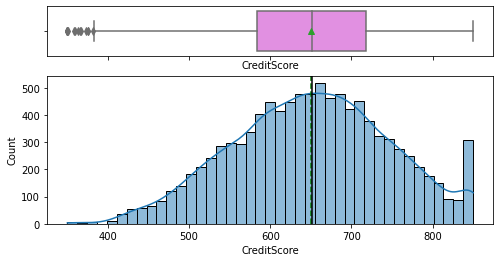

In [22]:
histogram_boxplot(data, "CreditScore", kde=True, figsize=(8, 4))

#### The credit score is fairly evenly distributed with a spike at the high end and a few outliers on the low end.

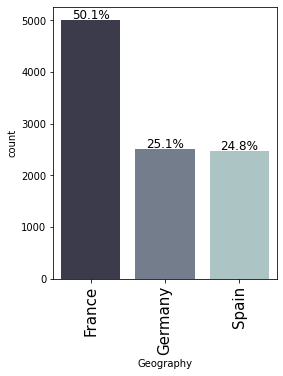

In [23]:
labeled_barplot(data, "Geography", perc=True)

##### Half of the bank customers are from France. The other 50% are split between Germany and Spain.

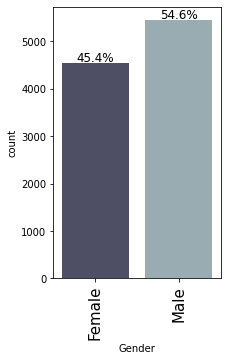

In [24]:
labeled_barplot(data, "Gender", perc=True)

#### There are slightly more males then females with males holding 54.6% majority.

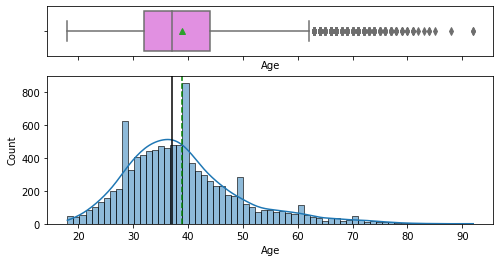

In [25]:
histogram_boxplot(data, "Age", kde=True, figsize=(8, 4))

#### There are a few peaks in the late 20s and 30s. There are a bunch of outliers over 60 years old.

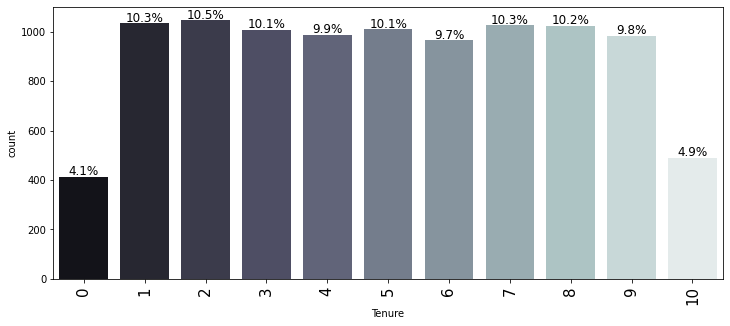

In [26]:
labeled_barplot(data, "Tenure", perc=True)

#### Fairly even distrobution with dips at both ends. 

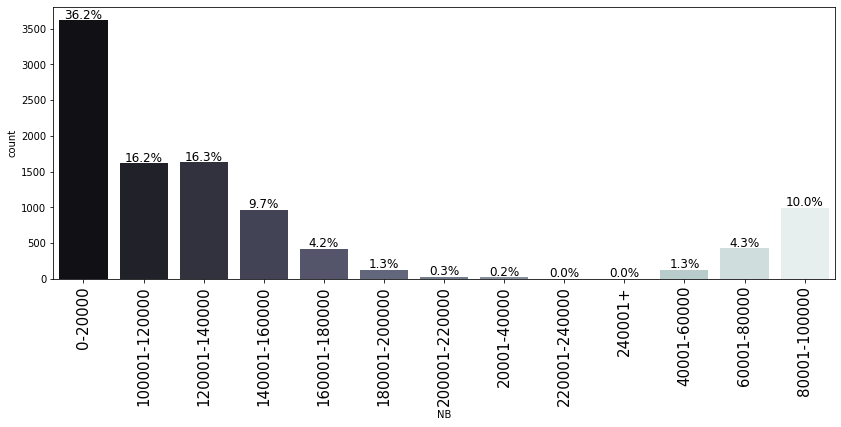

In [27]:
labeled_barplot(data, "NB", perc=True)

#### A majority of the data is at 0-20000 dollar balance. the next highest groups are 120001-140000 and 100001-120000.

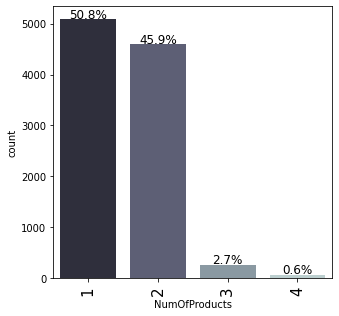

In [28]:
labeled_barplot(data, "NumOfProducts", perc=True)

#### A vast majority (96.7%) of customers have 1 or 2 products with the bank.

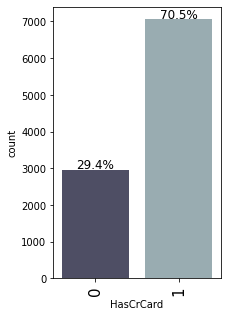

In [29]:
labeled_barplot(data, "HasCrCard", perc=True)

#### There is a 70% majority of customers that have a credit card.

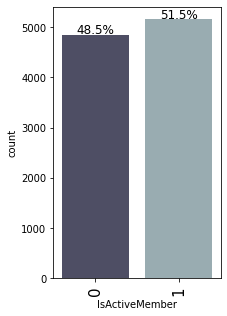

In [30]:
labeled_barplot(data, "IsActiveMember", perc=True)

#### A little over half of the bank memebers are active members.

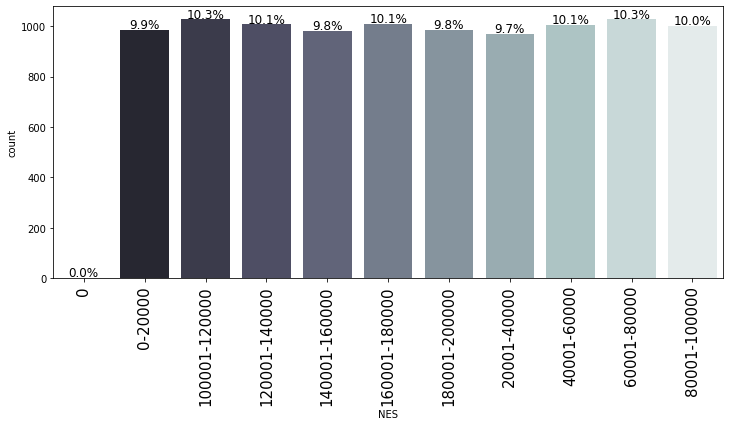

In [31]:
labeled_barplot(data, "NES", perc=True)

#### The salary distrobution is fairly flat.

## Bi/Multi-variate

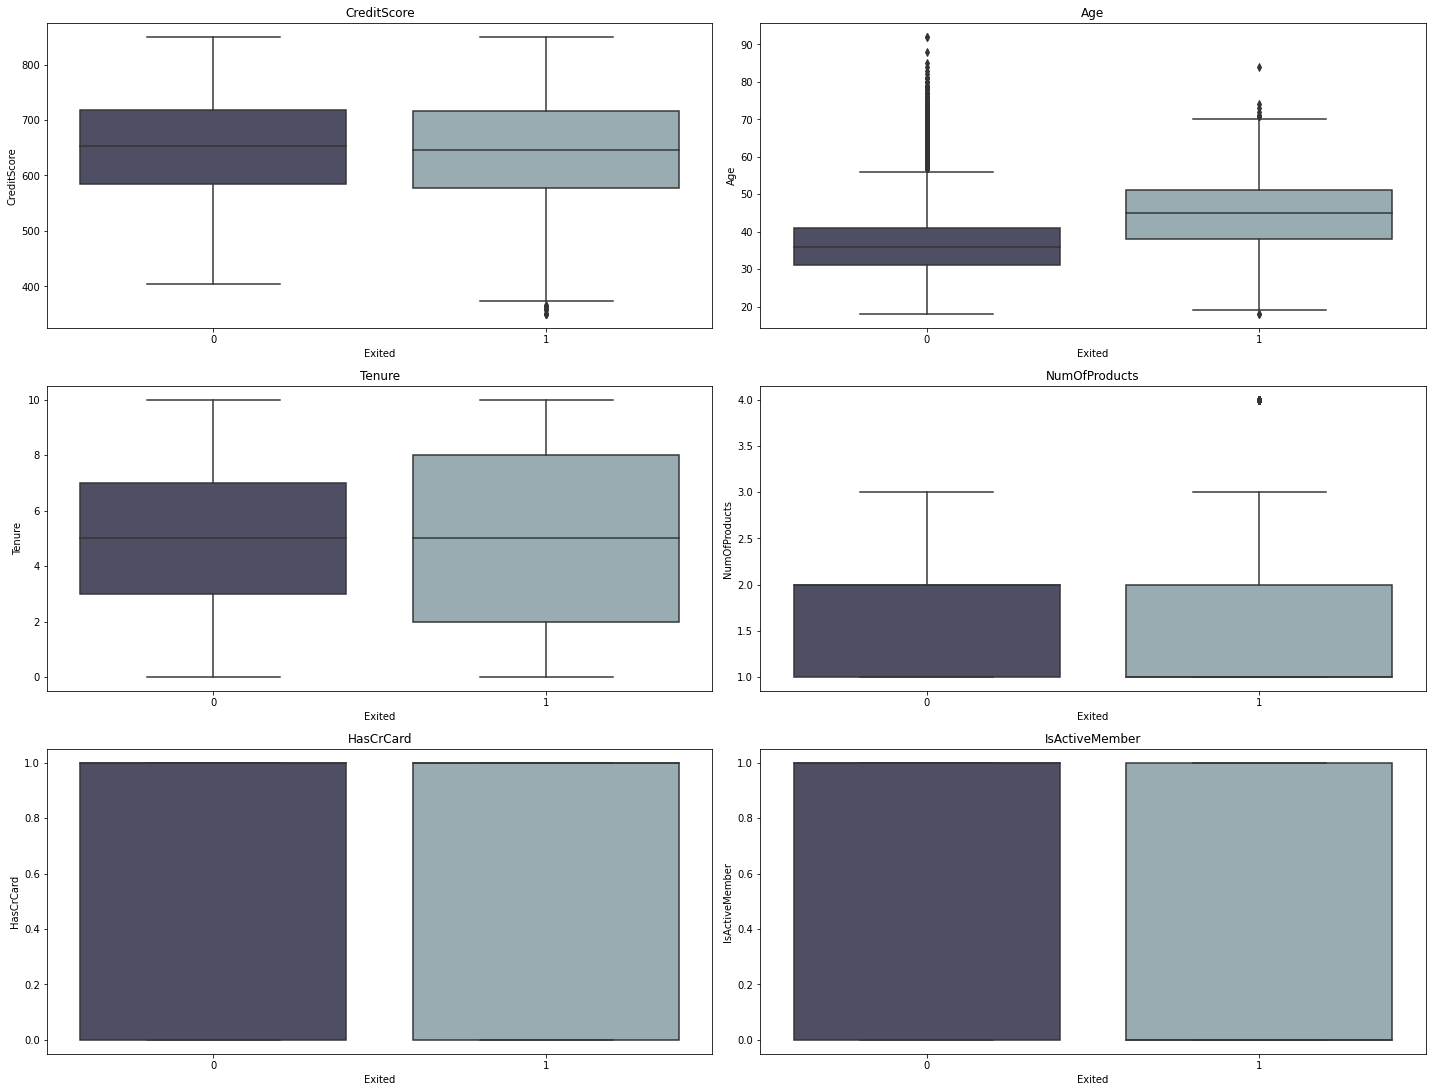

In [32]:
colsvtarg1 = data[
    ["CreditScore", "Age", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember",]
].columns.tolist()
plt.figure(figsize=(20, 35))

for i, variable in enumerate(colsvtarg1):
    plt.subplot(7, 2, i + 1)
    sns.boxplot(data["Exited"], data[variable], palette="bone")
    plt.tight_layout()
    plt.title(variable)
plt.show()

#### Higher `Age` and `Tenure` tend to have the greatest effect on whether or not a customer exited. 

In [33]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


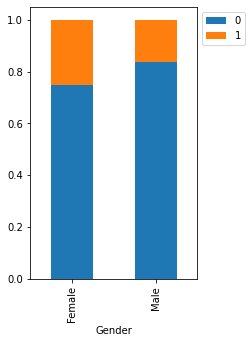

In [34]:
stacked_barplot(data, "Gender", "Exited")

#### Females are more likely to exit then males.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


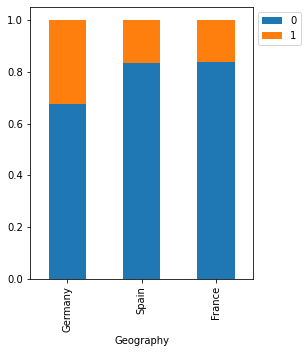

In [35]:
stacked_barplot(data, "Geography", "Exited")

#### Germans are the most likely to exit.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


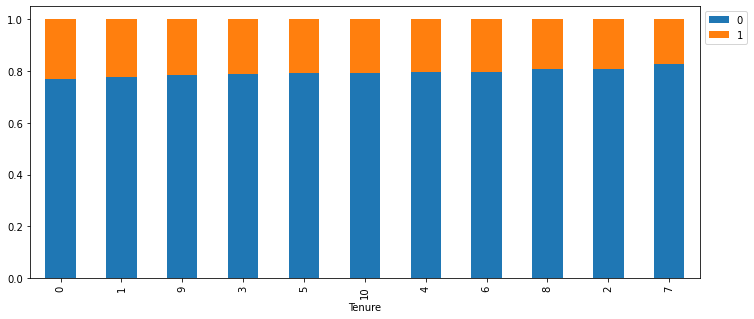

In [36]:
stacked_barplot(data, "Tenure", "Exited")

#### Customers that have been with the bank for a year or less have the highest exit rate.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


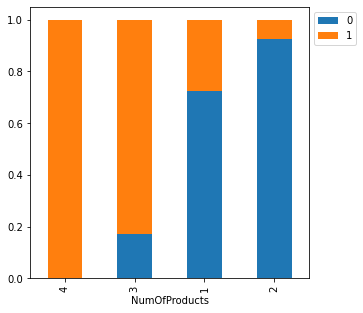

In [37]:
stacked_barplot(data, "NumOfProducts", "Exited")

#### Having 3 or 4 products with the company has a very high exit rate.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


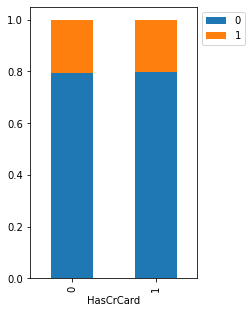

In [38]:
stacked_barplot(data, "HasCrCard", "Exited")

#### These graphs are a little too close to call.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


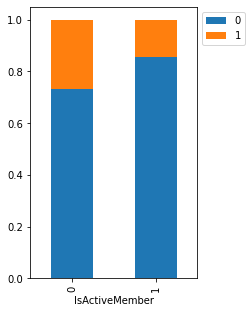

In [39]:
stacked_barplot(data, "IsActiveMember", "Exited")

#### Members that are not active seem to exit more then active customers.

Exited            0     1    All
NB                              
All            7963  2037  10000
0-20000        3119   502   3621
100001-120000  1172   446   1618
120001-140000  1224   408   1632
140001-160000   748   218    966
80001-100000    802   197    999
160001-180000   335    88    423
60001-80000     345    85    430
40001-60000      93    33    126
180001-200000    94    32    126
200001-220000    14    16     30
20001-40000      16     9     25
220001-240000     1     2      3
240001+           0     1      1
------------------------------------------------------------------------------------------------------------------------


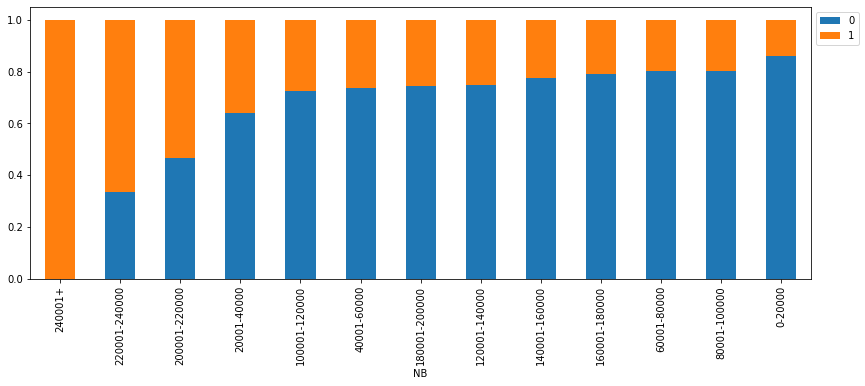

In [40]:
stacked_barplot(data, "NB", "Exited")

#### Customers in the highest 3 Balance groups had the highest rate of exit.

Exited            0     1    All
NES                             
All            7963  2037  10000
160001-180000   784   225   1009
60001-80000     815   212   1027
100001-120000   816   211   1027
140001-160000   775   206    981
180001-200000   779   206    985
0-20000         788   198    986
120001-140000   811   196   1007
20001-40000     773   196    969
80001-100000    806   196   1002
40001-60000     815   191   1006
0                 1     0      1
------------------------------------------------------------------------------------------------------------------------


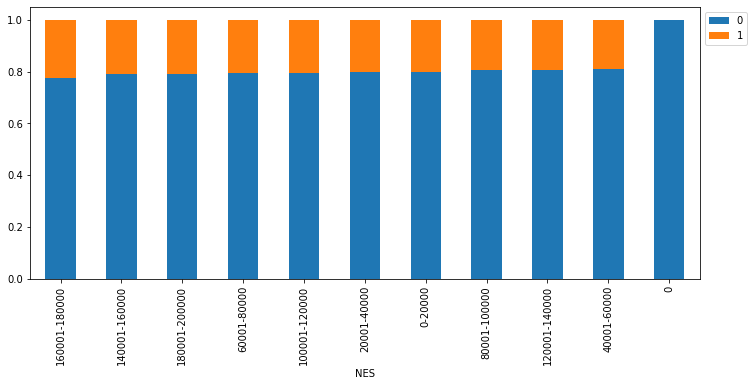

In [41]:
stacked_barplot(data, "NES", "Exited")

#### Exited distrobution seems to be fairly level. 

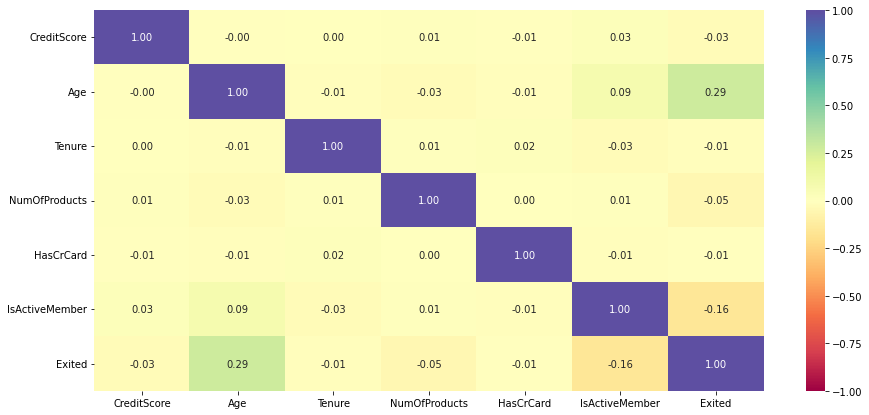

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### `Age` had the highest correlation with the target variable (`Exited`).
#### The only other correlation of note was the -0.30 correlation between `NumOfProducts` and `Balance`

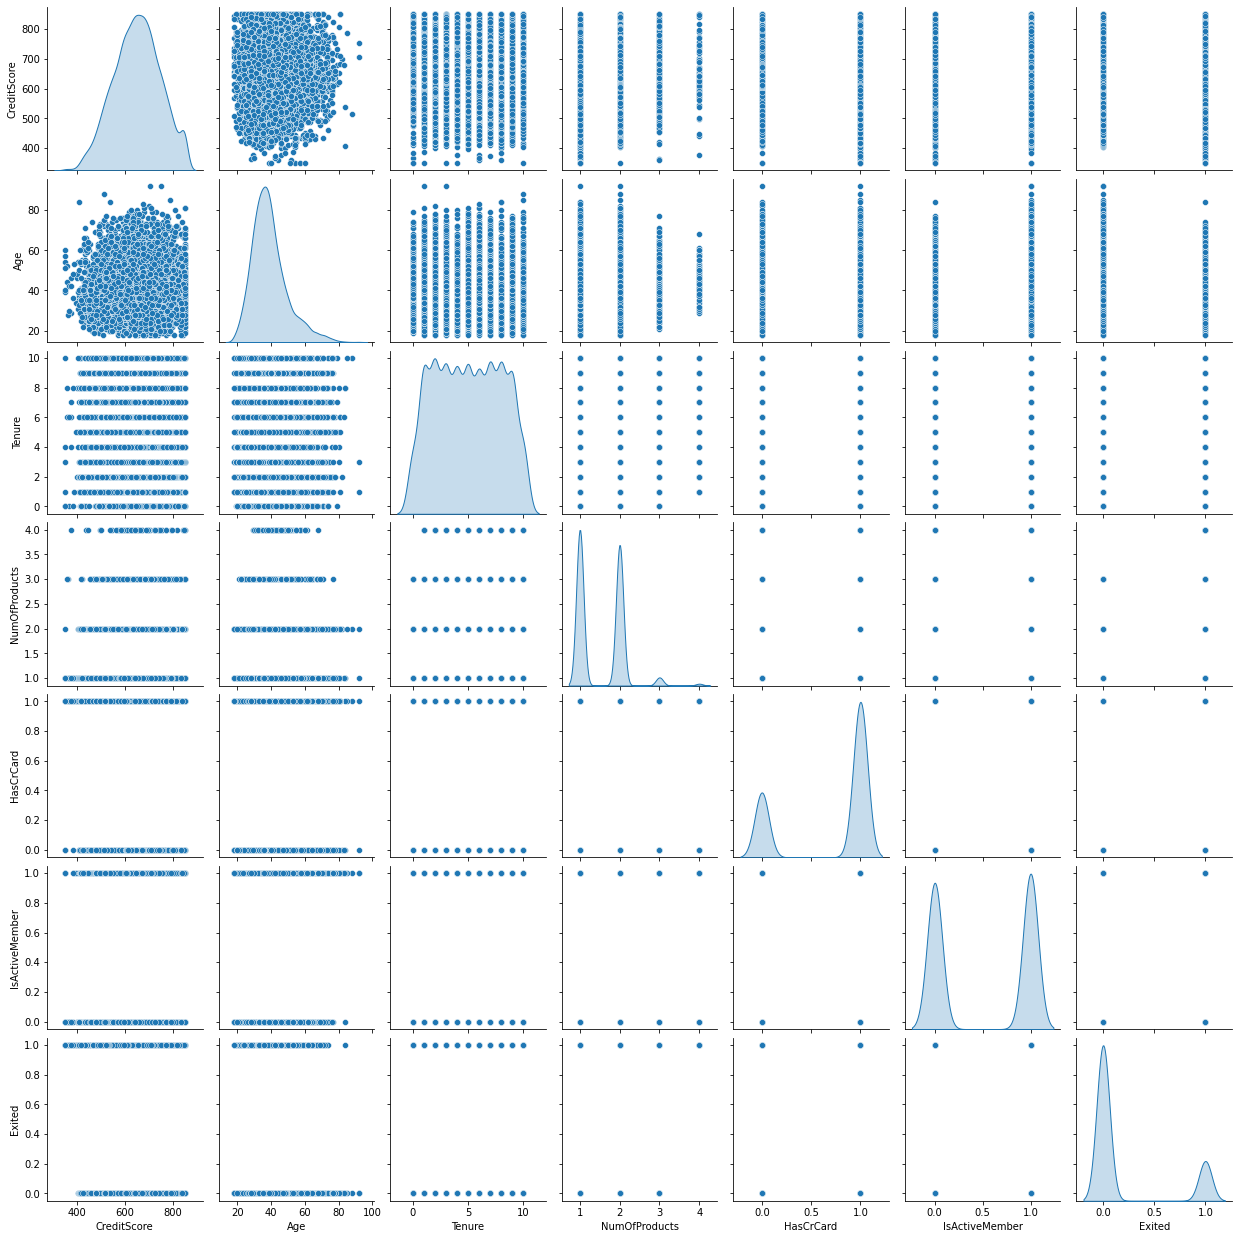

In [43]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

# 4. Data Split and Scaling

In [44]:
## Storing required categorical variables in cat_dat to apply dummification 
cat_data = ["Geography",'Gender','Tenure', 'NumOfProducts', 'NES', 'NB']


In [45]:
##Splitting Independent and dependent variable in X and Y respectively
X = data.drop(["Exited"], axis=1)
Y = data[["Exited"]]

print(X.shape)
print(Y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [46]:
# Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)
# Splitting the train set into  dev set and training set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=1
)

In [47]:
X_train = pd.get_dummies(X_train, columns=cat_data, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_data, drop_first=True)
X_val = pd.get_dummies(X_val, columns=cat_data, drop_first=True)

In [48]:
scaler = preprocessing.RobustScaler()
# fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)
y_val = scaler.fit_transform(y_val)

In [49]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# 5. Neural Network Models

## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer will exit and the customer does not.
* Predicting a customer will not exit and  customer does.

### Which case is more important? 
* Predicting that a customer will not exit and the customer does would have more of a negative impact on the bank.

### How to reduce this loss i.e need to reduce False Negative?
* The bank would want `Recall` to be maximized, the greater the Recall, the higher the chances of minimizing False Negative. Hence, the focus should be on increasing Recall or minimizing the False Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can focus on customers exiting.

In [50]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

## Model 1 - Basic ANN with 3 hidden layers

In [51]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

In [52]:
# model.add(Dense(64, activation="relu", input_shape=(41,)))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(1, activation="sigmoid"))

model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(41,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,890
Trainable params: 5,890
Non-trainable params: 0
_________________________________________________________________


In [54]:
optimizer = Adam(learning_rate=0.001)
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
 
                             verbose=0, mode='min', restore_best_weights= True)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [55]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[es])

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.4471 - accuracy: 0.8097 - val_loss: 0.3747 - val_accuracy: 0.8345
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3687 - accuracy: 0.8500 - val_loss: 0.3551 - val_accuracy: 0.8560
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3503 - accuracy: 0.8589 - val_loss: 0.3501 - val_accuracy: 0.8550
Epoch 4/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8637 - val_loss: 0.3442 - val_accuracy: 0.8590
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8662 - val_loss: 0.3452 - val_accuracy: 0.8515
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3203 - accuracy: 0.8705 - val_loss: 0.3540 - val_accuracy: 0.8565
Epoch 7/50
200/200 [==============================] - 1s 4ms/step - loss: 0.3138 - accuracy: 0.8755 - val_loss: 0.3624 - val_accuracy: 0.8525
Epoch 

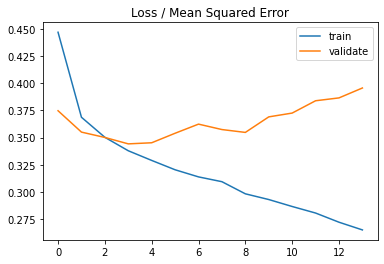

In [56]:
plt.title("Loss / Mean Squared Error")
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validate")
plt.legend()
plt.show()

In [57]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.8590


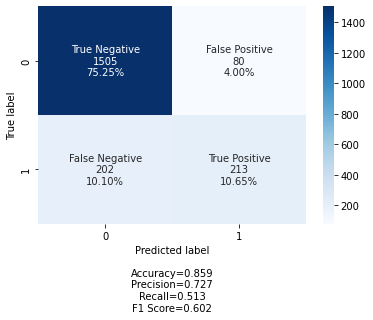

In [58]:
y_pred1 = model.predict(X_test)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(axis=1))
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
make_confusion_matrix(
    cm, group_names=labels, #categories=categories,
    cmap="Blues",
)


In [59]:
print(score)

[0.34422072768211365, 0.859000027179718]


### * This model had a bad Recall score at 0.513. I will need to play with the hyperparameters and run a few more models.

## Model 2 - Previous model with kernal_initializer and class weights.

In [60]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

In [61]:
model2 = Sequential()
model2.add(
    Dense(64, activation="relu", kernel_initializer="he_normal", input_shape=(41,))
)
model2.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model2.add(Dense(2, activation="sigmoid", kernel_initializer="he_normal"))

In [62]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,890
Trainable params: 5,890
Non-trainable params: 0
_________________________________________________________________


In [63]:
optimizer2 = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer2, loss="binary_crossentropy", metrics=["accuracy"])

In [64]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test),  validation_split=0.1, batch_size=500, class_weight={0: 1., 1: 4.}, epochs=50, callbacks=[es])

Epoch 1/50
12/12 [==============================] - 1s 24ms/step - loss: 1.1349 - accuracy: 0.7382 - val_loss: 0.6701 - val_accuracy: 0.6734
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 1.0785 - accuracy: 0.6984 - val_loss: 0.6605 - val_accuracy: 0.6687
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 1.0262 - accuracy: 0.6849 - val_loss: 0.6239 - val_accuracy: 0.6906
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.9546 - accuracy: 0.7210 - val_loss: 0.5673 - val_accuracy: 0.7312
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.8821 - accuracy: 0.7347 - val_loss: 0.5284 - val_accuracy: 0.7453
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.8350 - accuracy: 0.7571 - val_loss: 0.5129 - val_accuracy: 0.7422
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.8091 - accuracy: 0.7542 - val_loss: 0.4801 - val_accuracy: 0.7719
Epoch 8/50
12/12 [=

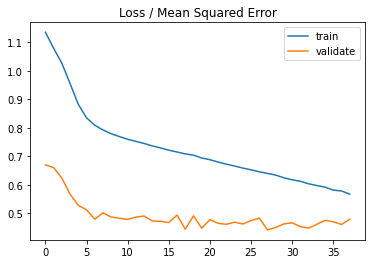

In [65]:
plt.title("Loss / Mean Squared Error")
plt.plot(history2.history["loss"], label="train")
plt.plot(history2.history["val_loss"], label="validate")
plt.legend()
plt.show()

In [66]:
score = model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.8415


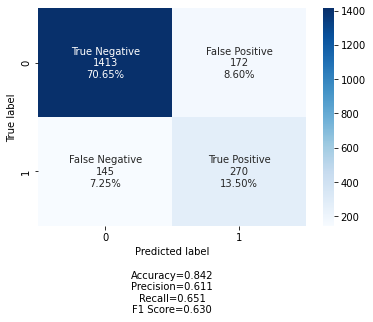

In [67]:
y_pred2 = model2.predict(X_test)

cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
make_confusion_matrix(
    cm2, group_names=labels, cmap="Blues",  # categories=categories,
)

### * The Recall score went from 0.513 to 0.651. I would like to see this number go higher.

## Model 3 - Adding dropout to the previous model.

In [68]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

In [69]:
model3 = Sequential()
model3.add(
    Dense(64, activation="relu", kernel_initializer="he_normal", input_shape=(41,))
)
model3.add(Dropout(0.5))
model3.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation="sigmoid", kernel_initializer="he_normal"))

In [70]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

In [71]:
optimizer3 = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer3, loss="binary_crossentropy", metrics=["accuracy"])

In [72]:
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test),  validation_split=0.1, batch_size=500, class_weight={0: 1., 1: 4.}, epochs=50, callbacks=[es])

Epoch 1/50
12/12 [==============================] - 1s 25ms/step - loss: 1.3050 - accuracy: 0.5781 - val_loss: 0.6669 - val_accuracy: 0.7172
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 1.2119 - accuracy: 0.5594 - val_loss: 0.6767 - val_accuracy: 0.6859
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 1.1702 - accuracy: 0.5276 - val_loss: 0.6833 - val_accuracy: 0.6484
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 1.1433 - accuracy: 0.5205 - val_loss: 0.6847 - val_accuracy: 0.6281
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 1.1219 - accuracy: 0.5141 - val_loss: 0.6843 - val_accuracy: 0.6125
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 1.1154 - accuracy: 0.5365 - val_loss: 0.6817 - val_accuracy: 0.6359
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 1.1116 - accuracy: 0.5415 - val_loss: 0.6788 - val_accuracy: 0.6422
Epoch 8/50
12/12 [=

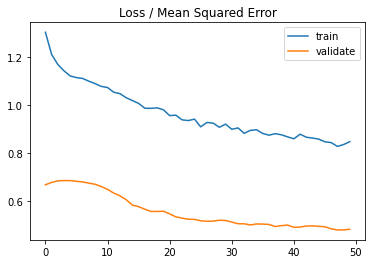

In [73]:
plt.title("Loss / Mean Squared Error")
plt.plot(history3.history["loss"], label="train")
plt.plot(history3.history["val_loss"], label="validate")
plt.legend()
plt.show()

In [74]:
score = model3.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.8185


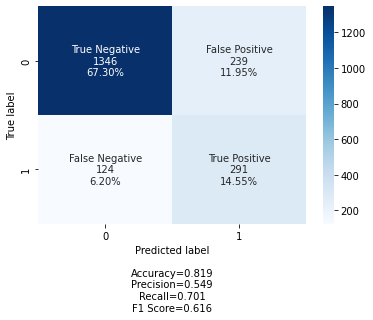

In [75]:
y_pred3 = model3.predict(X_test)

cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred3.argmax(axis=1))
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
make_confusion_matrix(
    cm2, group_names=labels, cmap="Blues",  # categories=categories,
)

### The Loss/Mean Square Error graph looked better and the Recall was 0.701, I will try to keep improving. 

## Model 4 - Attemping Model 2 with Batch Normalization. 

In [76]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

In [77]:
model4 = Sequential()
model4.add(
    Dense(64, activation="relu", kernel_initializer="he_normal", input_shape=(41,))
)
model4.add(BatchNormalization())
model4.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model4.add(BatchNormalization())
model4.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model4.add(BatchNormalization())
model4.add(Dense(2, activation="sigmoid", kernel_initializer="he_normal"))

In [78]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               1

In [79]:
optimizer4 = Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer4, loss="binary_crossentropy", metrics=["accuracy"])

In [80]:
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test),  validation_split=0.1, batch_size=500, class_weight={0: 1., 1: 4.}, epochs=50, callbacks=[es])

Epoch 1/50
12/12 [==============================] - 2s 31ms/step - loss: 1.3121 - accuracy: 0.5092 - val_loss: 0.6501 - val_accuracy: 0.7344
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 1.0953 - accuracy: 0.5955 - val_loss: 0.6384 - val_accuracy: 0.7469
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 0.9892 - accuracy: 0.6382 - val_loss: 0.6207 - val_accuracy: 0.7531
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9242 - accuracy: 0.6628 - val_loss: 0.5988 - val_accuracy: 0.7516
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.8780 - accuracy: 0.6849 - val_loss: 0.5745 - val_accuracy: 0.7656
Epoch 6/50
12/12 [==============================] - 0s 9ms/step - loss: 0.8462 - accuracy: 0.7115 - val_loss: 0.5517 - val_accuracy: 0.7703
Epoch 7/50
12/12 [==============================] - 0s 10ms/step - loss: 0.8152 - accuracy: 0.7332 - val_loss: 0.5305 - val_accuracy: 0.7906
Epoch 8/50
12/12

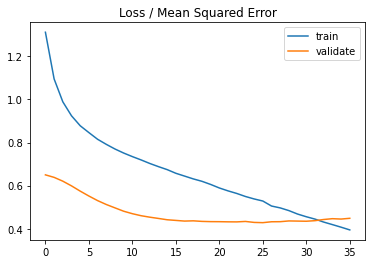

In [81]:
plt.title("Loss / Mean Squared Error")
plt.plot(history4.history["loss"], label="train")
plt.plot(history4.history["val_loss"], label="validate")
plt.legend()
plt.show()

In [82]:
score = model4.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8355


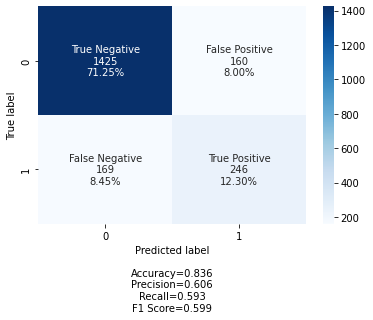

In [83]:
y_pred4 = model4.predict(X_test)

cm2 = confusion_matrix(y_test.argmax(axis=1), y_pred4.argmax(axis=1))
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
make_confusion_matrix(
    cm2, group_names=labels, cmap="Blues",  # categories=categories,
)

### Model 4 continued the poor performance of the prior models. Scoring 0.593 in Recall.

## Model 5 - Finding the best Parameters with RandomizedSearchCV.

In [132]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

In [133]:
def create_model_5(lr, batch_size):
    np.random.seed(42)
    model5 = Sequential()
    model5.add(
        Dense(256, activation="relu", kernel_initializer="he_normal", input_shape=(41,))
    )
    model5.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
    model5.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
    model5.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
    model5.add(Dense(1, activation="sigmoid", kernel_initializer="he_normal"))

    # compile model
    optimizer = Adam(learning_rate=lr)
    model5.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model

In [134]:
keras_estimator = KerasClassifier(build_fn=create_model_5, verbose=1)
# define the grid search parameters
param_random = {
    "batch_size": [32, 64, 128, 256, 512],
    "lr": [0.01, 0.1, 0.001],
}

kfold_splits = 3
random = RandomizedSearchCV(
    estimator=keras_estimator,
    verbose=1,
    cv=kfold_splits,
    param_distributions=param_random,
    n_jobs=-1,
)

In [135]:
random_result = random.fit(X_train, y_train, validation_split=0.1, verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_["mean_test_score"]
stds = random_result.cv_results_["std_test_score"]
params = random_result.cv_results_["params"]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
INFO:tensorflow:Assets written to: ram://b68ade7f-e6b7-42bb-9bc4-be7af3d77901/assets
INFO:tensorflow:Assets written to: ram://696ecf0f-abc2-4a6d-a826-228158792b06/assets
INFO:tensorflow:Assets written to: ram://2f7fbd24-8577-42cc-a685-7684ac1dbe32/assets
INFO:tensorflow:Assets written to: ram://85a4d502-04ca-44cb-8743-ad2506f72b23/assets
INFO:tensorflow:Assets written to: ram://711d5239-c334-4b00-bf0f-cb62a36a919f/assets
INFO:tensorflow:Assets written to: ram://24d60577-0852-46ff-9e5a-1843e37f037e/assets
INFO:tensorflow:Assets written to: ram://5f4435d6-d05b-4c3e-98a7-76662cfa18e6/assets
INFO:tensorflow:Assets written to: ram://8e22d111-7367-449d-b314-b98582ee8370/assets
INFO:tensorflow:Assets written to: ram://56a19854-3793-46b4-a5b7-6a01d459180d/assets
INFO:tensorflow:Assets written to: ram://435ea7a3-f99b-40fc-95a6-235951ad31a9/assets
INFO:tensorflow:Assets written to: ram://692143f9-3273-47e8-ab91-ac1cc9dd6d71/assets
INFO

In [136]:
model5=create_model_5(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,890
Trainable params: 5,890
Non-trainable params: 0
_________________________________________________________________


In [137]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history5=model5.fit(X_train, y_train, validation_data=(X_test, y_test),  validation_split=0.1, batch_size=512, class_weight={0: 1., 1: 4.}, epochs=50, callbacks=[es])

Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 0.5480 - accuracy: 0.8634 - val_loss: 0.4828 - val_accuracy: 0.7734
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.5020 - accuracy: 0.8535 - val_loss: 0.4898 - val_accuracy: 0.7906
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4803 - accuracy: 0.8608 - val_loss: 0.5019 - val_accuracy: 0.7953
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.8687 - val_loss: 0.5093 - val_accuracy: 0.7984
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4530 - accuracy: 0.8719 - val_loss: 0.5182 - val_accuracy: 0.8016
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.8780 - val_loss: 0.5330 - val_accuracy: 0.7891
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4307 - accuracy: 0.8795 - val_loss: 0.5382 - val_accuracy: 0.7953
Epoch 8/50
23/23 [=

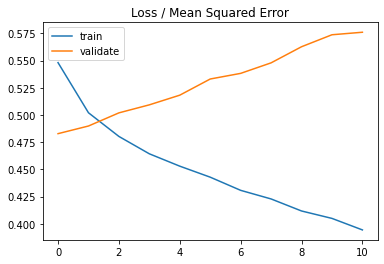

In [138]:
plt.title("Loss / Mean Squared Error")
plt.plot(history5.history["loss"], label="train")
plt.plot(history5.history["val_loss"], label="validate")
plt.legend()
plt.show()

In [139]:
score = model5.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4530 - accuracy: 0.8040


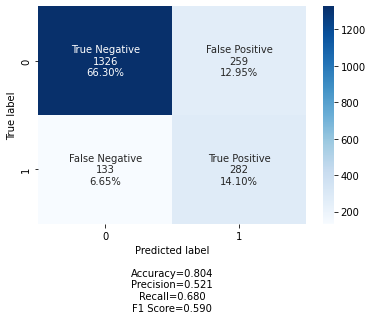

In [140]:
y_pred5 = model5.predict(X_test)

cm5 = confusion_matrix(y_test.argmax(axis=1), y_pred5.argmax(axis=1))
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
make_confusion_matrix(
    cm5, group_names=labels, cmap="Blues",  # categories=categories,
)

### Model 5 while having some parameters improved did not improve the Recall higher then Model 3 as it only scored 0.680.

## Model 6 - Adding Dropout to Model 5 

In [128]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random

random.seed(42)
tf.random.set_seed(42)

In [129]:
def create_model_6(lr, batch_size):
    np.random.seed(42)
    model6 = Sequential()
    model6.add(
        Dense(256, activation="relu", kernel_initializer="he_normal", input_shape=(41,))
    )
    model6.add(Dropout(0.2))
    model6.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
    model6.add(Dropout(0.2))
    model6.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
    model6.add(Dropout(0.2))
    model6.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
    model6.add(Dropout(0.2))
    model6.add(Dense(1, activation="sigmoid", kernel_initializer="he_normal"))

    # compile model
    optimizer = Adam(learning_rate=lr)
    model6.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model

In [130]:
keras_estimator = KerasClassifier(build_fn=create_model_5, verbose=1)
# define the grid search parameters
param_random = {
    "batch_size": [32, 64, 128, 256, 512, 1024],
    "lr": [0.01, 0.1, 0.001],
}

kfold_splits = 3
random = RandomizedSearchCV(
    estimator=keras_estimator,
    verbose=1,
    cv=kfold_splits,
    param_distributions=param_random,
    n_jobs=-1,
)

In [131]:
random_result = random.fit(X_train, y_train, validation_split=0.1, verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_["mean_test_score"]
stds = random_result.cv_results_["std_test_score"]
params = random_result.cv_results_["params"]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
INFO:tensorflow:Assets written to: ram://e7966c2a-b806-4769-9c94-4c70a932a4b6/assets
INFO:tensorflow:Assets written to: ram://118cf66c-62dc-4764-9146-91bb90759186/assets
INFO:tensorflow:Assets written to: ram://95009a12-f361-4c81-bd77-0f27015615a1/assets
INFO:tensorflow:Assets written to: ram://30796c74-1fdd-40e1-8ccd-906af7622be6/assets
INFO:tensorflow:Assets written to: ram://db8c3941-869f-49eb-88a7-128645d5d919/assets
INFO:tensorflow:Assets written to: ram://551c181d-1018-4c65-ba9e-7d012e6753c1/assets
INFO:tensorflow:Assets written to: ram://d5968304-1620-4632-be0f-5992be5c01b6/assets
INFO:tensorflow:Assets written to: ram://f0c0f3f2-b6da-4b5e-9a06-e4419de98e22/assets
INFO:tensorflow:Assets written to: ram://52e25ad5-e340-45c7-875b-58bad509b211/assets
INFO:tensorflow:Assets written to: ram://d7f49f79-2456-4c83-aa7f-79bfeb61a954/assets
INFO:tensorflow:Assets written to: ram://4da08be5-d510-439e-ba9a-fe0dc2eb7237/assets
INFO

In [141]:
model6=create_model_6(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

model6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,890
Trainable params: 5,890
Non-trainable params: 0
_________________________________________________________________


In [142]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
model6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history6=model6.fit(X_train, y_train, epochs=50, batch_size = 1024, callbacks=[es], verbose=1,validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 2s 114ms/step - loss: 0.2959 - accuracy: 0.8654 - val_loss: 0.3531 - val_accuracy: 0.8680
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.2501 - accuracy: 0.8889 - val_loss: 0.3622 - val_accuracy: 0.8727
Epoch 3/50
5/5 [==============================] - 0s 30ms/step - loss: 0.2465 - accuracy: 0.8896 - val_loss: 0.3723 - val_accuracy: 0.8758
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 0.2456 - accuracy: 0.8930 - val_loss: 0.3636 - val_accuracy: 0.8766
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 0.2392 - accuracy: 0.8971 - val_loss: 0.3508 - val_accuracy: 0.8789
Epoch 6/50
5/5 [==============================] - 0s 16ms/step - loss: 0.2350 - accuracy: 0.8996 - val_loss: 0.3448 - val_accuracy: 0.8820
Epoch 7/50
5/5 [==============================] - 0s 24ms/step - loss: 0.2333 - accuracy: 0.9002 - val_loss: 0.3444 - val_accuracy: 0.8797
Epoch 8/50
5/5 [==========

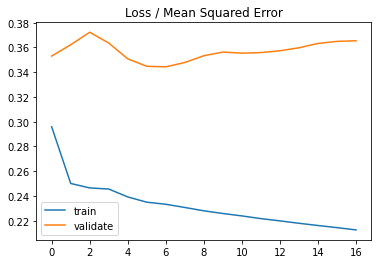

In [143]:
plt.title("Loss / Mean Squared Error")
plt.plot(history6.history["loss"], label="train")
plt.plot(history6.history["val_loss"], label="validate")
plt.legend()
plt.show()

In [144]:
score = model6.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.8400


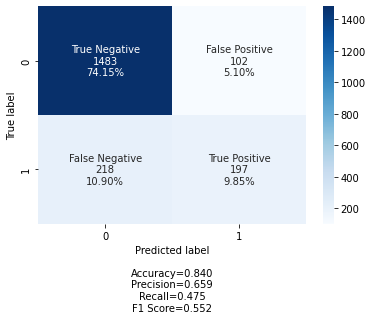

In [145]:
y_pred6 = model6.predict(X_test)

cm6 = confusion_matrix(y_test.argmax(axis=1), y_pred6.argmax(axis=1))
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
make_confusion_matrix(
    cm6, group_names=labels, cmap="Blues",  # categories=categories,
)

### Model 6 is worse off with a recall of 0.475.

# 5. Conclusion

#### * The best Recall score I could get was with Model 3 scoring 0.701. Adding Dropout with the Class Weights seemed to have the best effect on my Neural Network.
#### * The ability to minimize False Negatives is ok at this number. I would have liked to see .8+ but even with hyperparameter tuning I was unable to go in the correct direction. 
#### * The next step would be to further customize the parameters but I would like to discuss with a group to find better parameters.